In [1]:
%matplotlib inline
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
from tqdm import tqdm

In [3]:
# Plotting all in a single graph

# MCTS
mypath = 'MCTS_RESULTS/extra/decision_times'
mcts_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [17]:
ITs = [50, 100, 200, 400, 800]
df_arr = []
for IT in ITs:
    files = [m for m in mcts_files if f"{IT}IT" in m]
    # print(files)
    dt_arr = []
    for file in files:
        log_path = f"{mypath}/{file}"
        with open(log_path) as file:
            for line in file:
                decision_time = float(line.split(":")[-1])
                dt_arr.append(decision_time)
    df_arr.append((IT, dt_arr))

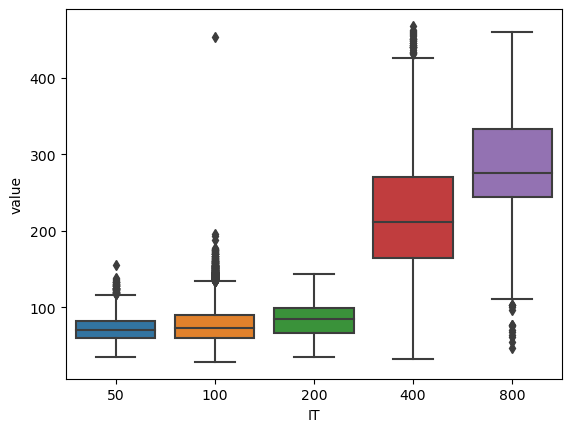

In [21]:
import matplotlib.pyplot as plt

df = pd.DataFrame(df_arr, columns=['IT', 'times'])
df = df.explode('times')

df1 = df[['IT', 'times']].melt(id_vars = [
    'IT'
])
import seaborn as sns

plt.ylabel('Decision Time (s)')
plt.ylabel('MCTS Iterations')
sns.boxplot(data = df1, x = 'IT', y = 'value', showfliers=True)
fp = "plots/decision_time.eps"
plt.savefig(fp, format='eps')

In [14]:
df

,IT,times
0,50,59.622044
0,50,69.355381
0,50,63.437327
0,50,54.713054
0,50,67.819113
...,...,...
0,50,79.847079
0,50,77.512111
0,50,63.802455
0,50,55.293355
